# Generating Learning Curves

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from average_forecast import load_data

import warnings
warnings.filterwarnings("ignore")

In [3]:
def load_data_refined(filename, wf_id):
    """
    Function loads data stored in the file filename and returns it as an numpy ndarray.
    """
    data = load_data(filename)[wf_id]
    return pd.DataFrame(data=data, index=range(len(data)))

## Generating the Learning Curves

The following two functions are used to generate the data required for a learning curve and to actually plot the curve itself. Note that learning_curve is a helper function used in plot_learning_curve.

In [5]:
def learning_curve(estimator, X, y, cv, train_sizes):
    train_error = []
    test_error = []
    for num_points in train_sizes:
        subset_x = X[:num_points]
        subset_y = y[:num_points]
        
        split_idx = int(0.8 * len(subset_x))
        
        train_x = subset_x.head(split_idx)
        train_y = subset_y.head(split_idx)
        test_x = subset_x.tail(len(X) - split_idx)
        test_y = subset_y.tail(len(y) - split_idx)
    
        estimator.fit(train_x, train_y)
        train_error.append(mean_squared_error(train_y, estimator.predict(train_x)))
        test_error.append(mean_squared_error(test_y, estimator.predict(test_x)))

    return train_sizes, train_error, test_error

In [6]:
def plot_learning_curve(estimator, title, X, y, train_sizes, ylim=None, cv=None):
    """
    Plots the learning curve for the model. This function is taken predominantly from
    an sklearn example.
    """
    plt.figure(figsize=(12,5))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Number of Training Examples")
    plt.ylabel("Mean Squared Error")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, train_sizes=train_sizes, cv=cv)
    
    plt.grid()
    plt.plot(train_sizes, train_scores, 'o-', color="r", label="Training Error")
    plt.plot(train_sizes, test_scores, 'o-', color="g", label="Test Error")

    plt.legend(loc="best")
    return plt

## Main Code
Here is the code that actually uses the above functions and classes to generate the three learning curves.

Loading Data


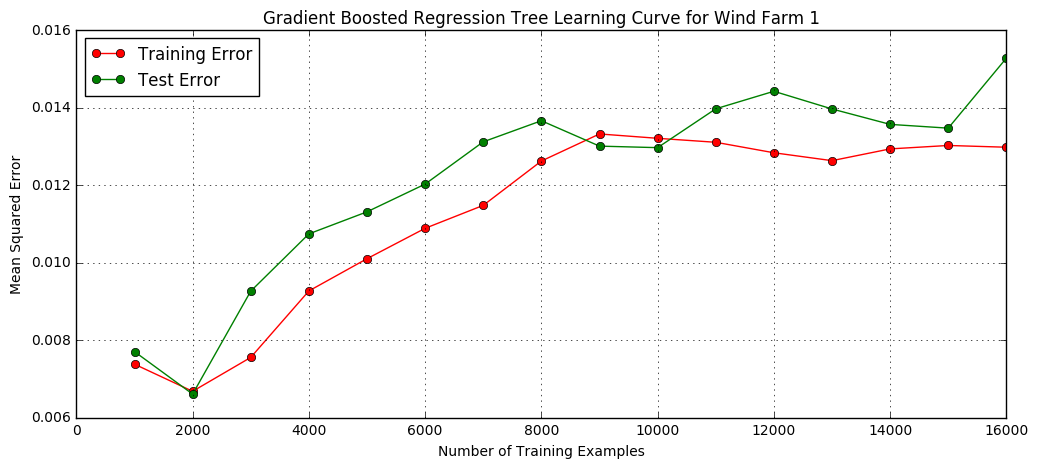

Loading Data


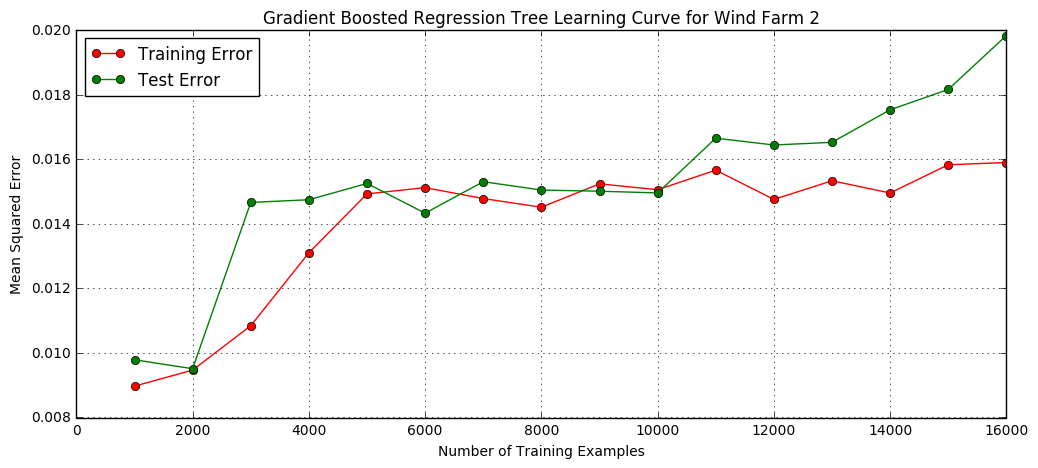

Loading Data


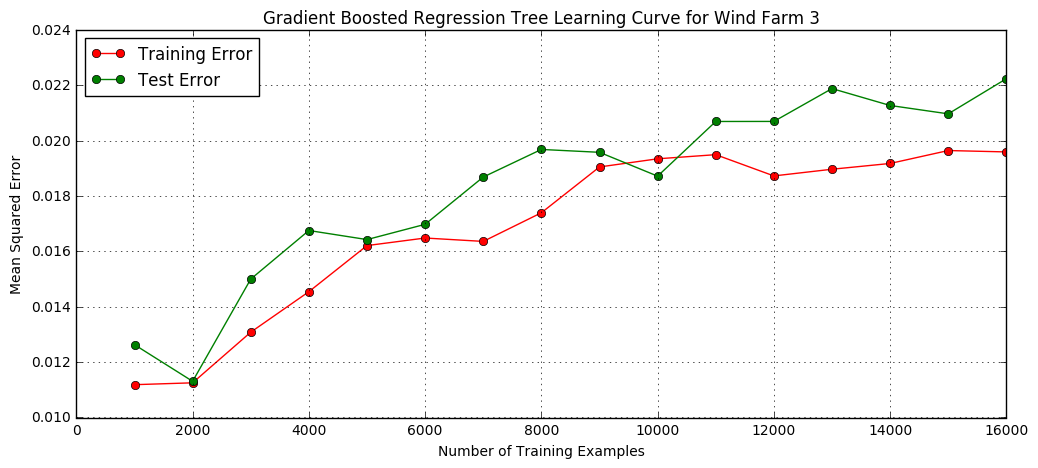

Loading Data


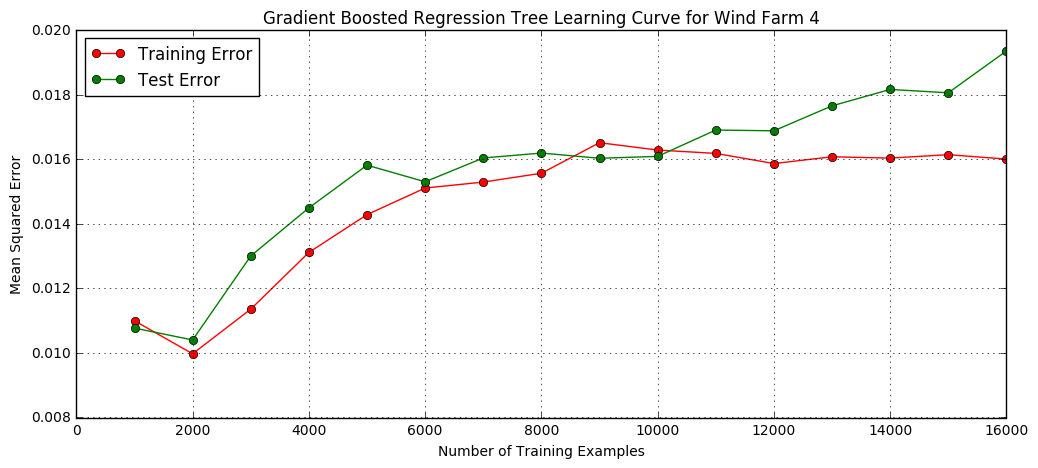

Loading Data


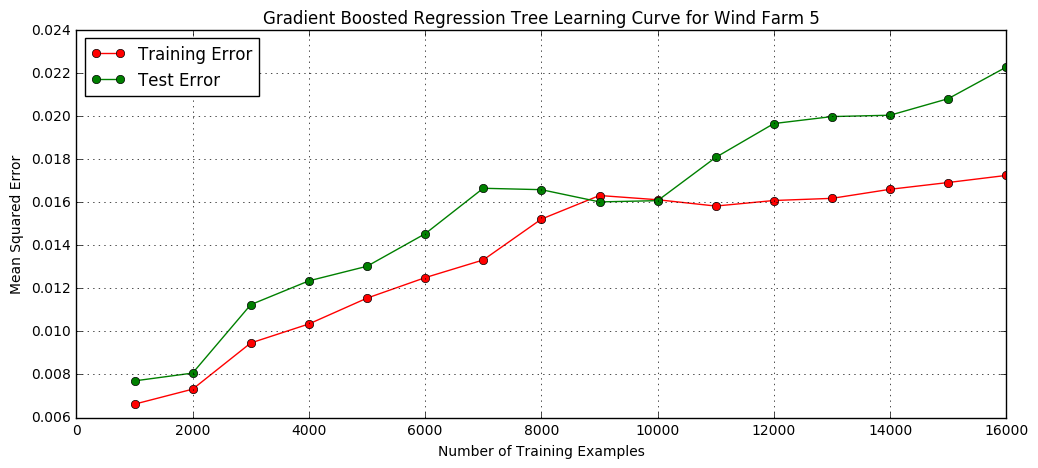

Loading Data


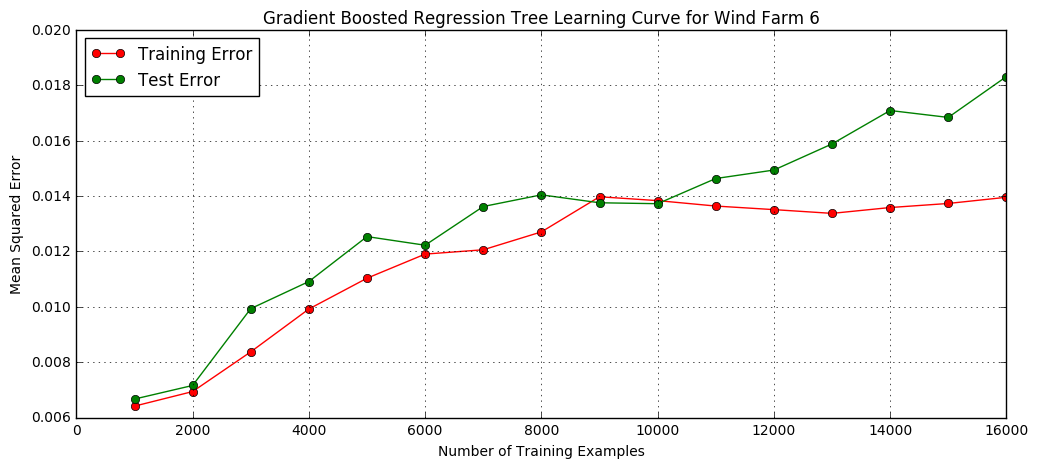

Loading Data


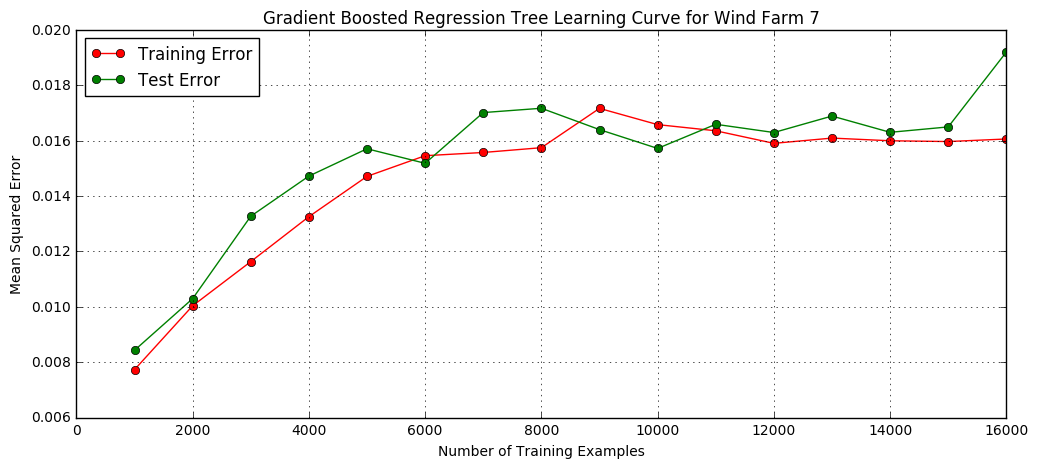

In [9]:
features = range(len(train_data.columns) - 1)
target = [len(train_data.columns) - 1]
training_sizes = range(1000, 17000, 1000)

for wf_id in range(1, 8):
    train_data = load_data_refined('../data/virtual_aggregate_data.csv', wf_id)
    train_x = train_data[features]
    train_y = train_data[target]

    title = 'Gradient Boosted Regression Tree Learning Curve for Wind Farm #%i' %wf_id
    gbr = GradientBoostingRegressor(n_estimators=300, learning_rate=0.01, max_depth=2, min_samples_split=100, max_features='sqrt')
    plt = plot_learning_curve(gbr, title, train_x, train_y, ylim=None, cv=None, train_sizes=training_sizes)
    plt.show()